# Ecosistema actual, Huggingface y modelos pre entrenados.

---

# Modelos:

## 1. [Swin Transformer](https://huggingface.co/docs/transformers/model_doc/swin)
- **Tipo:** Transformer jerárquico.
- **Características:**
  - Utiliza ventanas deslizantes (windowed attention) para atención local.
  - Crea representaciones jerárquicas a partir de imágenes.
  - Mejora la escalabilidad en procesamiento de imágenes de alta resolución.

## 2. [Convolutional Vision Transformer (CvT)](https://huggingface.co/docs/transformers/model_doc/cvt)
- **Tipo:** Híbrido CNN y Transformer.
- **Características:**
  - Aplica convoluciones iniciales para captura de características locales.
  - Utiliza bloques de Transformer para modelar relaciones globales.
  - Eficiente en tareas de visión con reducción de complejidad computacional.

## 3. [MobileViT](https://huggingface.co/docs/transformers/model_doc/mobilevit)
- **Tipo:** Arquitectura eficiente para dispositivos móviles.
- **Características:**
  - Integra convoluciones y Transformers de forma modular.
  - Diseñada para balancear rendimiento y eficiencia en recursos limitados.
  - Optimizada para aplicaciones en tiempo real.

## 4. [Pyramid Vision Transformer](https://huggingface.co/docs/transformers/v4.45.2/en/model_doc/pvt#transformers.PvtForImageClassification)
- **Tipo:** Transformer con enfoque en múltiples escalas.
- **Características:**
  - Implementa arquitectura en pirámide para procesamiento de imágenes.
  - Captura información a diferentes resoluciones, mejorando la generalización.
  - Eficaz en la detección de características tanto finas como gruesas.


## 5. [Masked Autoencoder](https://huggingface.co/docs/transformers/v4.45.2/en/model_doc/vit_mae#vitmae)
- **Tipo:** Autoencoder con enmascaramiento.
- **Características:**
  - Enmascara partes de la imagen durante el entrenamiento para aprendizaje de características.
  - Similar al enmascaramiento en modelos de lenguaje como BERT.
  - Facilita la transferencia de conocimiento para tareas de preentrenamiento y finetuning.

---
---

# Guía para Trabajar con Modelos Preentrenados de Imágenes en Hugging Face con PyTorch



## 1. Preprocesamiento de los Datos

- **Redimensionamiento y normalización**: La clase `ImageProcessor` ajusta automáticamente la imagen a las dimensiones que el modelo necesita.

    ```python
    from transformers import AutoImageProcessor
    processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224")
    inputs = processor(images=image, return_tensors="pt")
    ```

- **Augmentación de datos**: Puedes usar librerías como `torchvision` para agregar augmentación de datos y mejorar el rendimiento del modelo.

    ```python
    import torchvision.transforms as transforms
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
    ])
    ```
---

## 2. Trabajando con Modelos Preentrenados de Imágenes

### Pasos para usar modelos preentrenados:

1. **Instalación de librerías**: Hace falta tener instalada la librería `transformers` de Hugging Face, ya que ofrece acceso a modelos preentrenados y procesadores para el preprocesamiento de datos.

2. **Cargar el modelo y el procesador**: Se utiliza `AutoImageProcessor` para cargar el procesador que realizará el preprocesamiento de las imágenes (ajustes de tamaño, normalización, etc.), y por ejemplo `AutoModelForImageClassification` para cargar el modelo de clasificación preentrenado.

    ```python
    from transformers import AutoImageProcessor, AutoModelForImageClassification
    processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224")
    model = AutoModelForImageClassification.from_pretrained("google/vit-base-patch16-224")
    ```

3. **Preprocesar las imágenes**: Se utiliza el procesador para convertir la imagen en un formato adecuado (tensor), que luego puede ser alimentado al modelo.

4. **Inferencia y uso de logits**: Los logits son los valores sin normalizar que el modelo genera para cada clase de salida. En una tarea de clasificación, estos logits indican qué tan seguro está el modelo de que una imagen pertenece a una clase específica. El índice del logit maximo corresponde a la clase predicha.

    **Ejemplo de uso de logits**:
    ```python
    inputs = processor(images=image, return_tensors="pt")  
    outputs = model(**inputs)  
    logits = outputs.logits 
    ```

5. **Interpretar los logits**:  Para obtener la clase predicha, se toma el índice del logit más alto y se asocia con la etiqueta de la clase correspondiente.


    ```python
    predicted_class_idx = logits.argmax(-1).item() 
     print(f"Predicción de clase: {model.config.id2label[predicted_class_idx]}") 
    ```


---

## 3. Finetuning 

El **finetuning** ajusta un modelo preentrenado para tareas específicas utilizando un conjunto de datos más pequeño. Esto se logra actualizando los pesos de las últimas capas.

### Pasos para realizar finetuning:


```python
from transformers import Trainer, TrainingArguments

# Argumentos de entrenamiento
training_args = TrainingArguments(
    output_dir="results path",
    evaluation_strategy="epoch",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    save_strategy="epoch",
    logging_dir="login path",
)

# Definir Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset_train,
    eval_dataset=dataset_test,
    tokenizer=processor
)

# Entrenamiento
trainer.train()
```

---

### Recursos:
- [Documentación de Hugging Face Transformers](https://huggingface.co/docs/transformers/index)
- [Procesamiento de Imágenes](https://huggingface.co/docs/transformers/main_classes/image_processor)
- [Entrenamiento y Finetuning](https://huggingface.co/docs/transformers/training)



---
---
# Tarea: Fine-tuning de un modelo Vision Transformer

1. **Objetivo**: 
   Seleccione un modelo preentrenado que utilice Vision Transformers (ViTs) y un conjunto de datos adecuado. Realice un proceso de fine-tuning del modelo seleccionado.

   Pueden encontrar la documentacion de Transformers de Hugging Face en [Link](https://huggingface.co/docs/transformers/index)

   Datasets de imágenes en Hugging Face [Link](https://huggingface.co/datasets?modality=modality:image&sort=downloads)

   O pueden usar fuentes de preferencia.

   
2. **Una vez finalizado el fine-tuning**:
   - Justifique la elección del modelo preentrenado y del dataset.
   - Explique el proceso de fine-tuning realizado, especificando los parámetros ajustados y las modificaciones necesarias.
   - Evalúe el rendimiento del modelo preentrenado sin ajustes y compárelo con los resultados obtenidos tras el fine-tuning, discutiendo las mejoras o diferencias observadas.
---

A continuación sigue una pequeña ayuda:

In [1]:
!pip install transformers datasets diffusers accelerate
!pip install --upgrade jupyter ipywidgets

### Otra forma de buscar los datos en HuggingFace

In [9]:
from huggingface_hub import list_datasets, dataset_info
keywords = ["beans", "images", "MMU"]  # Lista de palabras clave
datasets = list_datasets()
dataset_details = []
for dataset in datasets:
    if any(keyword in dataset.id for keyword in keywords):
        try:
            info = dataset_info(dataset.id)
            dataset_details.append({
                "id": dataset.id,
                "downloads": getattr(info, 'downloads', 0),  # Cantidad de descargas, predeterminado 0
                "likes": getattr(info, 'likes', 0), 
                "comments": getattr(info, 'comments', 0) 
            })
        except Exception as e:
            print(f"Error al obtener información del dataset {dataset.id}: {e}")
sorted_datasets = sorted(dataset_details, key=lambda x: x['downloads'], reverse=True)
for dataset in sorted_datasets[:20]: # 20 datasets más descargados
    print(f"{dataset['id']}: {dataset['downloads']} descargas")

huggingface/documentation-images: 2483241 descargas
huggingface-course/documentation-images: 248234 descargas
trl-internal-testing/example-images: 112068 descargas
huggingface-deep-rl-course/course-images: 91201 descargas
hf-internal-testing/diffusers-images: 46721 descargas
diffusers/docs-images: 46537 descargas
huggingface/cookbook-images: 43036 descargas
ybelkada/documentation-images: 41169 descargas
patrickvonplaten/images: 36341 descargas
mishig/sample_images: 33845 descargas
YiYiXu/testing-images: 31707 descargas
HuggingFaceTB/images: 30776 descargas
huggingface-course/audio-course-images: 24096 descargas
diffusers/diffusers-images-docs: 23103 descargas
loubnabnl/repo-images: 18425 descargas
EduardoPacheco/documentation-images: 18258 descargas
JoPmt/hf_community_images: 15441 descargas
malteos/images: 14089 descargas
optimum/documentation-images: 12312 descargas
reach-vb/random-images: 12141 descargas


### Eligimos un set de datos y lo traemos

In [4]:
from datasets import load_dataset, DownloadConfig
download_config = DownloadConfig(delete_extracted=True, download_desc=None)
dataset = load_dataset("AI-Lab-Makerere/beans")

In [5]:
print(dataset)
print(dataset['train'].features)
print(dataset['train'][0])
print(dataset['train'].features['labels'].names)


print(f"Tamaño del conjunto de entrenamiento: {len(dataset['train'])}")
print(f"Tamaño del conjunto de validación: {len(dataset['validation'])}")
print(f"Tamaño del conjunto de prueba: {len(dataset['test'])}")

DatasetDict({
    train: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 1034
    })
    validation: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 133
    })
    test: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 128
    })
})
{'image_file_path': Value(dtype='string', id=None), 'image': Image(mode=None, decode=True, id=None), 'labels': ClassLabel(names=['angular_leaf_spot', 'bean_rust', 'healthy'], id=None)}
{'image_file_path': '/home/albert/.cache/huggingface/datasets/downloads/extracted/967f0d9f61a7a8de58892c6fab6f02317c06faf3e19fba6a07b0885a9a7142c7/train/angular_leaf_spot/angular_leaf_spot_train.0.jpg', 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x500 at 0x30E8A9B10>, 'labels': 0}
['angular_leaf_spot', 'bean_rust', 'healthy']
Tamaño del conjunto de entrenamiento: 1034
Tamaño del conjunto de validación: 133
Tamaño del conjunto de prueba: 128


### Eligimos un modelo pre entrenado y lo traemos

Modelo Swin Transformer entrenado en [ImageNet-1K](https://www.image-net.org/about.php) con una resolución de 224x224.

Fue presentado en el artículo [Swin Transformer: Hierarchical Vision Transformer using Shifted Windows" de Liu et al](https://arxiv.org/abs/2103.14030). 

Se lanzó por primera vez en este repositorio [Link](https://github.com/microsoft/Swin-Transformer)

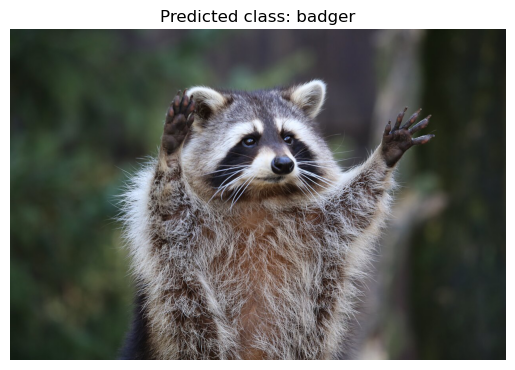

In [6]:
from transformers import AutoImageProcessor, SwinForImageClassification
import torch
import matplotlib.pyplot as plt
from PIL import Image


path = "../TP1/raccoon.jpg"
image = Image.open(path)


image_processor = AutoImageProcessor.from_pretrained("microsoft/swin-tiny-patch4-window7-224")
model = SwinForImageClassification.from_pretrained("microsoft/swin-tiny-patch4-window7-224")


inputs = image_processor(image, return_tensors="pt")

with torch.no_grad():
    logits = model(**inputs).logits

# model predicts one of the 1000 ImageNet classes
predicted_label = logits.argmax(-1).item()
predicted_class = model.config.id2label[predicted_label]  


plt.imshow(image)
plt.axis('off') 
plt.title(f'Predicted class: {predicted_class}') 
plt.show()


# * * *


# Tarea: Fine-tuning de un modelo Vision Transformer

1. **Objetivo**: 
   Seleccione un modelo preentrenado que utilice Vision Transformers (ViTs) y un conjunto de datos adecuado. Realice un proceso de fine-tuning del modelo seleccionado.

In [2]:
# Dependencias
import torch
from torch.utils.data import DataLoader
from datasets import load_dataset
#from transformers import MobileViTForImageClassification, MobileViTImageProcessor
from transformers import ViTForImageClassification, ViTImageProcessor
from transformers import TrainingArguments, Trainer
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [3]:
device =  'cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu'

### Conjunto de datos

Se selecciona fashion product images small (https://huggingface.co/datasets/ashraq/fashion-product-images-small), que se trata de imágenes de indumentaria con un total de 44072 muestras.

In [4]:
dataset = load_dataset('ashraq/fashion-product-images-small', split='train[:1000]')

In [5]:
# Visualizar el formato del dataset
dataset

Dataset({
    features: ['id', 'gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'year', 'usage', 'productDisplayName', 'image'],
    num_rows: 1000
})

In [9]:
dataset.column_names

['id',
 'gender',
 'masterCategory',
 'subCategory',
 'articleType',
 'baseColour',
 'season',
 'year',
 'usage',
 'productDisplayName',
 'image']

In [12]:
# Filtrar solo las columnas necesarias: 'articleType' y 'image'
dataset_cleaned = dataset.map(lambda x: {'articleType': x['articleType'], 'image': x['image']}, remove_columns=[col for col in dataset.column_names if col not in ['articleType', 'image']])

In [13]:
# Comporbar que las filas restantes sean las deseadas
dataset_cleaned

Dataset({
    features: ['articleType', 'image'],
    num_rows: 1000
})

In [14]:
# Cantidad de clases
print(f"Cantidad de clases: {len(dataset_cleaned['train'].unique('articleType'))+1}")

KeyError: "Column train not in the dataset. Current columns in the dataset: ['articleType', 'image']"

In [40]:
# Conversor de índice a label
id2label = {id:label for id, label in enumerate(dataset_cleaned.unique('articleType'))}
label2id = {label:id for id,label in id2label.items()}
id2label

{0: 'Shirts',
 1: 'Jeans',
 2: 'Watches',
 3: 'Track Pants',
 4: 'Tshirts',
 5: 'Socks',
 6: 'Casual Shoes',
 7: 'Belts',
 8: 'Flip Flops',
 9: 'Handbags',
 10: 'Tops',
 11: 'Bra',
 12: 'Sandals',
 13: 'Shoe Accessories',
 14: 'Sweatshirts',
 15: 'Deodorant',
 16: 'Formal Shoes',
 17: 'Bracelet',
 18: 'Lipstick',
 19: 'Flats',
 20: 'Kurtas',
 21: 'Waistcoat',
 22: 'Sports Shoes',
 23: 'Shorts',
 24: 'Briefs',
 25: 'Sarees',
 26: 'Perfume and Body Mist',
 27: 'Heels',
 28: 'Sunglasses',
 29: 'Innerwear Vests',
 30: 'Pendant',
 31: 'Laptop Bag',
 32: 'Scarves',
 33: 'Dresses',
 34: 'Night suits',
 35: 'Skirts',
 36: 'Wallets',
 37: 'Blazers',
 38: 'Ring',
 39: 'Kurta Sets',
 40: 'Clutches',
 41: 'Shrug',
 42: 'Backpacks',
 43: 'Caps',
 44: 'Trousers',
 45: 'Earrings',
 46: 'Camisoles',
 47: 'Boxers',
 48: 'Jewellery Set',
 49: 'Dupatta',
 50: 'Capris',
 51: 'Lip Gloss',
 52: 'Bath Robe',
 53: 'Mufflers',
 54: 'Tunics',
 55: 'Jackets',
 56: 'Trunk',
 57: 'Lounge Pants',
 58: 'Face Wash an

In [17]:
from datasets import DatasetDict

# Dividir en 80% entrenamiento y 20% para validación y prueba
train_val_test = dataset_cleaned.train_test_split(test_size=0.2, seed=42)
train_dataset = train_val_test['train']
temp_dataset = train_val_test['test']

# Dividir el 20% restante en 50% validación y 50% prueba (10% cada uno del original)
val_test_split = temp_dataset.train_test_split(test_size=0.5, seed=42)
val_dataset = val_test_split['train']
test_dataset = val_test_split['test']

# Unirlos en un DatasetDict
dataset_dict = DatasetDict({
    'train': train_dataset,
    'validation': val_dataset,
    'test': test_dataset
})

# Mostrar las cantidades de cada dataset
print(dataset_dict)


DatasetDict({
    train: Dataset({
        features: ['articleType', 'image'],
        num_rows: 800
    })
    validation: Dataset({
        features: ['articleType', 'image'],
        num_rows: 100
    })
    test: Dataset({
        features: ['articleType', 'image'],
        num_rows: 100
    })
})


In [18]:
from transformers import AutoImageProcessor, SwinForImageClassification

processor = AutoImageProcessor.from_pretrained("microsoft/swin-tiny-patch4-window7-224")
model = SwinForImageClassification.from_pretrained("microsoft/swin-tiny-patch4-window7-224")


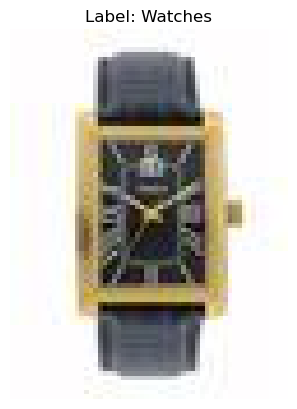

In [19]:
# Se toma como ejemplo para mostrar el primer elemento del dataset de train
item = train_dataset[0]

# Mostrar la imagen 
plt.imshow(item['image'])
plt.title(f"Label: {item['articleType']}")
plt.axis('off')
plt.show()

In [20]:
# Optimizar la mutiplicación matricial 
torch.set_float32_matmul_precision("medium")

In [21]:
# Preprocesar un dict de examples, usando el preprocessor instanciado
def preprocess_function(examples):
    # Ingresar las imágenes al preprocessor, normaliza, redimensiona, convierte 
    # a tensor y ajusta el tamaño de las imágenes para que sean iguales con padding
    inputs = processor(images=examples['image'], return_tensors="pt", padding=True)
    
    # Crea un tensor de ceros del tamaño de examples (arguemnto de la función)
    inputs['articleType'] = torch.tensor([0] * len(examples['articleType']), dtype=torch.float)
    
    # Devuelve el diccionario con las imágenes preprocesadas y un tensor de ceros
    return inputs

In [22]:
torch.cuda.empty_cache() 

In [23]:
def transform(example):
    # Convertir la imagen a un array de numpy si es un objeto de PIL (e.g., JpegImageFile)
    image = np.array(example['image']) if isinstance(example['image'], Image.Image) else example['image']

    # Verificar si la imagen solo tiene dos dimensiones
    #image = example['image']
    if image.ndim == 2:
        # Replicar la imagen en 3 canales (suponiendo que es RGB)
        image = np.stack([image] * 3, axis=-1)

    # Apply feature extractor transforms (resize, normalize, convert to tensor)
    inputs = processor(images=image, return_tensors="pt")

    # Añadir columna de "pixel_values" que es el valor de "pixel_values" de inputs
    # con una dimension menos 
    example['pixel_values'] = inputs['pixel_values'].squeeze()

    # Asignar el label de example a example
    example['articleType'] = example['articleType']

    # Devuelve example con la imagen preprocesada y la etiqueta
    return example

# Aplicar transform a cada ejemplo de los dataset de train, val y test
train_dataset = train_dataset.map(transform, keep_in_memory=True)
val_dataset = val_dataset.map(transform, keep_in_memory=True)
test_dataset = test_dataset.map(transform, keep_in_memory=True)


Map:   0%|          | 0/800 [00:00<?, ? examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

In [24]:
# Cambiar el formato
train_dataset.set_format(type='torch', columns=['pixel_values', 'articleType'])
val_dataset.set_format(type='torch', columns=['pixel_values', 'articleType'])
test_dataset.set_format(type='torch', columns=['pixel_values', 'articleType'])

In [29]:
# Verificar el cambio de formato
test_dataset['image'][0].size

(60, 80)

# Prueba de inferencia sin fine-tuning

In [30]:
print(inputs.shape)

NameError: name 'inputs' is not defined

In [45]:
# Conversor de índice a label
id2label = {id: label for id, label in enumerate(dataset_cleaned.unique('articleType'))}
label2id = {label: id for id, label in id2label.items()}

# Suponiendo que ya has configurado el DataLoader
test_loader = DataLoader(test_dataset, batch_size=32)

# Evaluate the model on test data
model.eval()  # Set model to evaluation mode
correct = 0
total = 0

# Bucle de evaluación
with torch.no_grad():
    for batch in test_loader:
        # Mapea las etiquetas de texto a índices numéricos si es necesario
        if isinstance(batch['articleType'], list):
            batch['articleType'] = [label2id[label] for label in batch['articleType']]  # Convertir etiquetas a índices numéricos

        batch['articleType'] = torch.tensor(batch['articleType'], dtype=torch.long)  # Convertir a tensor de tipo long (int64)
        batch['articleType'] = batch['articleType'].to('cpu')  # Enviar a CPU si es necesario

        # Preprocesamiento de las imágenes
        pixel_values = batch['pixel_values'].squeeze(1).float()  # Ajusta según la forma de tus imágenes
        
        # Forward pass (predicciones)
        outputs = model(pixel_values=pixel_values.to('cpu'))  # Asegúrate de que los datos de entrada estén en la CPU

        # Obtener las predicciones de la salida del modelo (suponiendo que el modelo es de clasificación)
        predictions = torch.argmax(outputs.logits, dim=-1).to('cpu')  # Obtener el índice de la clase más probable

        # Verificación de las predicciones y etiquetas
        print(f"Predictions: {predictions[:10]}")  # Muestra las primeras 10 predicciones
        print(f"True labels: {batch['articleType'][:10]}")  # Muestra las primeras 10 etiquetas reales

        # Comparación de las predicciones con las etiquetas reales
        correct += (predictions == batch['articleType']).sum().item()
        total += batch['articleType'].size(0)

# Calcular la precisión
accuracy = correct / total
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Predictions: tensor([585, 630, 610, 502, 630, 869, 869, 774, 409, 836])
True labels: tensor([26,  6,  4, 22, 12, 10,  0, 12,  2, 28])
Predictions: tensor([635, 891, 689, 678, 632, 841, 610, 543, 502, 774])
True labels: tensor([ 2,  8, 10, 43, 36, 44,  4,  1, 16,  6])
Predictions: tensor([631, 635, 459, 770, 610, 636, 680, 502, 610, 641])
True labels: tensor([15,  2, 11,  6,  4, 42,  8, 22,  4, 53])
Predictions: tensor([869, 610, 490, 841])
True labels: tensor([20,  4, 20, 14])
Test Accuracy: 0.00%


In [41]:
# Conversor de índice a label
id2label = {id: label for id, label in enumerate(dataset_cleaned.unique('articleType'))}
label2id = {label: id for id, label in id2label.items()}

test_loader = DataLoader(test_dataset, batch_size=32)

# Evaluate the model on test data
model.eval()  # Set model to evaluation mode
correct = 0
total = 0

with torch.no_grad():
    for batch in test_loader:
        # Convert articleType labels from strings to indices using label2id
        if isinstance(batch['articleType'], list):
            batch['articleType'] = [label2id[label] for label in batch['articleType']]
        
        # Convert to tensor
        batch['articleType'] = torch.tensor(batch['articleType'])

        pixel_values = batch['pixel_values'].squeeze(1).float()
        outputs = model(pixel_values=pixel_values.to('cpu'))  # Forward pass
        predictions = torch.argmax(outputs.logits, dim=-1)

        # Compute accuracy
        correct += (predictions.to('cpu') == batch['articleType']).sum().item()
        total += batch['articleType'].size(0)

accuracy = correct / total
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Test Accuracy: 0.00%


In [43]:
test_loader = DataLoader(test_dataset, batch_size=32)

# Evaluate the model on test data
model.eval()  # Set model to evaluation mode
correct = 0
total = 0

# Asegúrate de que tanto las predicciones como las etiquetas sean de tipo int64
predictions = predictions.to('cpu').long()
batch_labels = batch['articleType'].to('cpu').long()

with torch.no_grad():
    for batch in test_loader:
        # Convert articleType labels from strings to indices using label2id
        if isinstance(batch['articleType'], list):
        batch['articleType'] = [label2id[label] for label in batch['articleType']]
        
        # Convert to tensor
        batch['articleType'] = torch.tensor(batch['articleType'])

        pixel_values = batch['pixel_values'].squeeze(1).float()
        outputs = model(pixel_values=pixel_values.to('cpu'))  # Forward pass
        predictions = torch.argmax(outputs.logits, dim=-1)

        # Debugging: print the first few predictions and actual labels
        print("Predictions:", predictions[:10])
        print("True labels:", batch['articleType'][:10])

        # Compute accuracy
        correct += (predictions.to('cpu') == batch['articleType']).sum().item()
        total += batch['articleType'].size(0)

accuracy = correct / total
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Predictions: tensor([585, 630, 610, 502, 630, 869, 869, 774, 409, 836])
True labels: tensor([26,  6,  4, 22, 12, 10,  0, 12,  2, 28])


KeyboardInterrupt: 

In [31]:
test_loader = DataLoader(test_dataset, batch_size=32)

model.eval()

# Hacer inferencia sobre todo el dataset
predictions = []
with torch.no_grad():
    for batch in test_loader:
        # Obtener los tensores de imagen procesados
        inputs = batch['pixel_values']
        
        # Verificar la forma de los datos antes de pasarlos al modelo
        #print(f"Shape of inputs: {inputs.shape}")

        # Asegurarse de que las imágenes tengan 4 dimensiones: (batch_size, channels, height, width)
        if len(inputs.shape) == 3:
            inputs = inputs.unsqueeze(0)  # Añadir una dimensión extra para batch_size

        # Mover las imágenes al dispositivo adecuado (GPU o CPU)
        inputs = inputs.to(model.device)

        # Crear un diccionario con las claves correctas
        inputs_dict = {'pixel_values': inputs}

        # Realizar la predicción
        outputs = model(**inputs_dict)
        
        # Obtener las probabilidades y la predicción de la clase
        logits = outputs.logits
        predicted_class = logits.argmax(dim=-1)

        # Guardar las predicciones
        predictions.append(predicted_class.item())

# Las predicciones contienen las clases predichas
print(predictions)


RuntimeError: a Tensor with 32 elements cannot be converted to Scalar

In [37]:
test_loader = DataLoader(test_dataset, batch_size=32)

# Evaluate the model on test data
model.eval()  # Set model to evaluation mode
correct = 0
total = 0

with torch.no_grad():
    for batch in test_loader:
        pixel_values = batch['pixel_values'].squeeze(1).float()
        outputs = model(pixel_values=pixel_values.to('cpu'))  # Forward pass
        predictions = torch.argmax(outputs.logits, dim=-1)
        #correct += (predictions.to('cpu') == batch['articleType']).sum().item()
        #correct += (predictions.to('cpu') == batch['articleType']).to(torch.int).sum().item()
        correct += (predictions.to('cpu') == batch['articleType'].to('cpu')).to(torch.int).sum().item()
        total += batch['articleType'].size(0)

accuracy = correct / total
print(f"Test Accuracy: {accuracy * 100:.2f}%")

AttributeError: 'list' object has no attribute 'to'

In [38]:
print(type(predictions))
print(type(batch['articleType']))


<class 'torch.Tensor'>
<class 'list'>


In [39]:
# 2 intento
test_loader = DataLoader(test_dataset, batch_size=32)

# Evaluate the model on test data
model.eval()  # Set model to evaluation mode
correct = 0
total = 0

with torch.no_grad():
    for batch in test_loader:
        batch['articleType'] = torch.tensor(batch['articleType']) if isinstance(batch['articleType'], list) else batch['articleType']
        pixel_values = batch['pixel_values'].squeeze(1).float()
        outputs = model(pixel_values=pixel_values.to('cpu'))  # Forward pass
        predictions = torch.argmax(outputs.logits, dim=-1)
        correct += (predictions.to('cpu') == batch['articleType']).sum().item()
        total += batch['articleType'].size(0)

accuracy = correct / total
print(f"Test Accuracy: {accuracy * 100:.2f}%")

ValueError: too many dimensions 'str'

In [20]:
model.eval()

# Hacer inferencia sobre todo el dataset
predictions = []
with torch.no_grad():
    for example in test_dataset:
        # Obtener los tensores de imagen procesados
        inputs = example['pixel_values']
        
        # Mover las imágenes al dispositivo adecuado (GPU o CPU)
        inputs = inputs.to(model.device)

        # Crear un diccionario con las claves correctas
        inputs_dict = {'pixel_values': inputs}

        # Realizar la predicción
        outputs = model(**inputs_dict)
        
        # Obtener las probabilidades y la predicción de la clase
        logits = outputs.logits
        predicted_class = logits.argmax(dim=-1)

        # Guardar las predicciones
        predictions.append(predicted_class.item())

# Las predicciones contienen las clases predichas
print(predictions)


ValueError: not enough values to unpack (expected 4, got 3)

In [19]:
model.eval()

# Hacer inferencia sobre todo el dataset
predictions = []
with torch.no_grad():
    for example in test_dataset:
        # Obtener los tensores de imagen procesados
        inputs = example['pixel_values']
        
        # Mover las imágenes al dispositivo adecuado (GPU o CPU)
        inputs = inputs.to(model.device)

        # Realizar la predicción
        outputs = model(**inputs)
        
        # Obtener las probabilidades y la predicción de la clase
        logits = outputs.logits
        predicted_class = logits.argmax(dim=-1)

        # Guardar las predicciones
        predictions.append(predicted_class.item())

# Las predicciones contienen las clases predichas
print(predictions)

TypeError: SwinForImageClassification(
  (swin): SwinModel(
    (embeddings): SwinEmbeddings(
      (patch_embeddings): SwinPatchEmbeddings(
        (projection): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
      )
      (norm): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): SwinEncoder(
      (layers): ModuleList(
        (0): SwinStage(
          (blocks): ModuleList(
            (0-1): 2 x SwinLayer(
              (layernorm_before): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
              (attention): SwinAttention(
                (self): SwinSelfAttention(
                  (query): Linear(in_features=96, out_features=96, bias=True)
                  (key): Linear(in_features=96, out_features=96, bias=True)
                  (value): Linear(in_features=96, out_features=96, bias=True)
                  (dropout): Dropout(p=0.0, inplace=False)
                )
                (output): SwinSelfOutput(
                  (dense): Linear(in_features=96, out_features=96, bias=True)
                  (dropout): Dropout(p=0.0, inplace=False)
                )
              )
              (drop_path): SwinDropPath(p=0.1)
              (layernorm_after): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
              (intermediate): SwinIntermediate(
                (dense): Linear(in_features=96, out_features=384, bias=True)
                (intermediate_act_fn): GELUActivation()
              )
              (output): SwinOutput(
                (dense): Linear(in_features=384, out_features=96, bias=True)
                (dropout): Dropout(p=0.0, inplace=False)
              )
            )
          )
          (downsample): SwinPatchMerging(
            (reduction): Linear(in_features=384, out_features=192, bias=False)
            (norm): LayerNorm((384,), eps=1e-05, elementwise_affine=True)
          )
        )
        (1): SwinStage(
          (blocks): ModuleList(
            (0-1): 2 x SwinLayer(
              (layernorm_before): LayerNorm((192,), eps=1e-05, elementwise_affine=True)
              (attention): SwinAttention(
                (self): SwinSelfAttention(
                  (query): Linear(in_features=192, out_features=192, bias=True)
                  (key): Linear(in_features=192, out_features=192, bias=True)
                  (value): Linear(in_features=192, out_features=192, bias=True)
                  (dropout): Dropout(p=0.0, inplace=False)
                )
                (output): SwinSelfOutput(
                  (dense): Linear(in_features=192, out_features=192, bias=True)
                  (dropout): Dropout(p=0.0, inplace=False)
                )
              )
              (drop_path): SwinDropPath(p=0.1)
              (layernorm_after): LayerNorm((192,), eps=1e-05, elementwise_affine=True)
              (intermediate): SwinIntermediate(
                (dense): Linear(in_features=192, out_features=768, bias=True)
                (intermediate_act_fn): GELUActivation()
              )
              (output): SwinOutput(
                (dense): Linear(in_features=768, out_features=192, bias=True)
                (dropout): Dropout(p=0.0, inplace=False)
              )
            )
          )
          (downsample): SwinPatchMerging(
            (reduction): Linear(in_features=768, out_features=384, bias=False)
            (norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          )
        )
        (2): SwinStage(
          (blocks): ModuleList(
            (0-5): 6 x SwinLayer(
              (layernorm_before): LayerNorm((384,), eps=1e-05, elementwise_affine=True)
              (attention): SwinAttention(
                (self): SwinSelfAttention(
                  (query): Linear(in_features=384, out_features=384, bias=True)
                  (key): Linear(in_features=384, out_features=384, bias=True)
                  (value): Linear(in_features=384, out_features=384, bias=True)
                  (dropout): Dropout(p=0.0, inplace=False)
                )
                (output): SwinSelfOutput(
                  (dense): Linear(in_features=384, out_features=384, bias=True)
                  (dropout): Dropout(p=0.0, inplace=False)
                )
              )
              (drop_path): SwinDropPath(p=0.1)
              (layernorm_after): LayerNorm((384,), eps=1e-05, elementwise_affine=True)
              (intermediate): SwinIntermediate(
                (dense): Linear(in_features=384, out_features=1536, bias=True)
                (intermediate_act_fn): GELUActivation()
              )
              (output): SwinOutput(
                (dense): Linear(in_features=1536, out_features=384, bias=True)
                (dropout): Dropout(p=0.0, inplace=False)
              )
            )
          )
          (downsample): SwinPatchMerging(
            (reduction): Linear(in_features=1536, out_features=768, bias=False)
            (norm): LayerNorm((1536,), eps=1e-05, elementwise_affine=True)
          )
        )
        (3): SwinStage(
          (blocks): ModuleList(
            (0-1): 2 x SwinLayer(
              (layernorm_before): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
              (attention): SwinAttention(
                (self): SwinSelfAttention(
                  (query): Linear(in_features=768, out_features=768, bias=True)
                  (key): Linear(in_features=768, out_features=768, bias=True)
                  (value): Linear(in_features=768, out_features=768, bias=True)
                  (dropout): Dropout(p=0.0, inplace=False)
                )
                (output): SwinSelfOutput(
                  (dense): Linear(in_features=768, out_features=768, bias=True)
                  (dropout): Dropout(p=0.0, inplace=False)
                )
              )
              (drop_path): SwinDropPath(p=0.1)
              (layernorm_after): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
              (intermediate): SwinIntermediate(
                (dense): Linear(in_features=768, out_features=3072, bias=True)
                (intermediate_act_fn): GELUActivation()
              )
              (output): SwinOutput(
                (dense): Linear(in_features=3072, out_features=768, bias=True)
                (dropout): Dropout(p=0.0, inplace=False)
              )
            )
          )
        )
      )
    )
    (layernorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (pooler): AdaptiveAvgPool1d(output_size=1)
  )
  (classifier): Linear(in_features=768, out_features=1000, bias=True)
) argument after ** must be a mapping, not Tensor

In [24]:
outputs = model.predict(test_dataset)

AttributeError: 'SwinForImageClassification' object has no attribute 'predict'

In [ ]:
outputs.metrics

In [ ]:
y_true = outputs.label_ids
y_pred = outputs.predictions.argmax(1)

y_pred_filtered = np.where(y_pred < len(labels), y_pred, -1)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = outputs.label_ids
y_pred = outputs.predictions.argmax(1)

labels = train_dataset.features['label'].names
cm = confusion_matrix(y_true, y_pred_filtered)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Unknown"] + labels )
disp.plot(xticks_rotation=45)

# Fine-tuning

In [23]:
import os
os.environ["WANDB_DISABLED"] = "true" # no utilizamos weights and biases

In [ ]:
# Entrenamiento
training_args = TrainingArguments(
    output_dir="./vit-finetuned-cifar10",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=64,
    per_device_eval_batch_size=64,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    log_level = 'info',
    fp16 = True,
)

def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)
    accuracy = np.mean(preds == labels)
    return {"accuracy": accuracy}

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    #compute_metrics=compute_metrics,
)

trainer.train()

In [ ]:
# Evaluación
eval_results = trainer.evaluate()
print(eval_results)

In [ ]:
# Limpiar la caché
torch.cuda.empty_cache() 

# Prueba

In [ ]:
test_loader = DataLoader(test_dataset, batch_size=32)

# Evaluate the model on test data
model.eval()  # Set model to evaluation mode
correct = 0
total = 0

with torch.no_grad():
    for batch in test_loader:
        pixel_values = batch['pixel_values'].squeeze(1).float()
        outputs = model(pixel_values=pixel_values.to('cuda'))  # Forward pass
        predictions = torch.argmax(outputs.logits, dim=-1)
        correct += (predictions.to('cpu') == batch['label']).sum().item()
        total += batch['label'].size(0)

accuracy = correct / total
print(f"Test Accuracy: {accuracy * 100:.2f}%")

In [1]:
from datasets import Dataset
Dataset.cleanup_cache_files()


TypeError: Dataset.cleanup_cache_files() missing 1 required positional argument: 'self'

In [5]:
from transformers import AutoImageProcessor, SwinForImageClassification
import torch
from datasets import load_dataset

dataset = load_dataset("huggingface/cats-image", trust_remote_code=True)
image = dataset["test"]["image"][0]

image_processor = AutoImageProcessor.from_pretrained("microsoft/swin-tiny-patch4-window7-224")
model = SwinForImageClassification.from_pretrained("microsoft/swin-tiny-patch4-window7-224")

inputs = image_processor(image, return_tensors="pt")

with torch.no_grad():
    logits = model(**inputs).logits

# model predicts one of the 1000 ImageNet classes
predicted_label = logits.argmax(-1).item()
print(model.config.id2label[predicted_label])

cats-image.py:   0%|          | 0.00/2.56k [00:00<?, ?B/s]

Generating test split: 0 examples [00:00, ? examples/s]

tabby, tabby cat


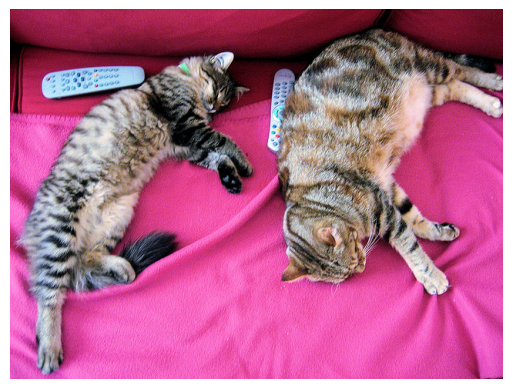

In [11]:
import matplotlib.pyplot as plt

# Muestra la imagen en un gráfico
plt.imshow(image)
plt.axis("off")  # Quita los ejes
plt.show()